# Diabetes classification using KNN
## Motivations:

Diabetes is a chronic disease that interferes with the body's ability to digest sugar, causing sugar levels to build up in the blood stream. When left untreated, a build up of sugar in the blood stream can cause blockage in the arteries, block bloodflow to the extremities, and eyes. Further complications from the blockages may cause heart disease/heart attacks, loss of extremities and/or vision loss. 

There are three different types of diabetes: 
* Type 1: Also known as Juvenile diabetes, is chronic and occurs to younger patients due to the pancreas not being able to produce any or enough insulin.
* Type 2: Happens to predominantly adult patients, onset from lifestyle habits such as poor diet, or sedentary lifestyle. In type 2, the body makes less insulin or becomes resistant to insulin. 
* Gestational: Occurs when women aren't able to produce enough insulin during pregnancy.
 
To prevent complications from diabetes, patients must monitor sugar levels in the blood through bi/annual or annual A1C tests and daily pricks, adapt better diet and lifestyle habits to manage weight, and use the hormone insulin to digest sugar if their bodies stop producing it or don't produce enough. 

**Why is this a problem?**
Currently, diabetes affects 37 million people a year, and costs the US $327 million dollars in healthcare costs, and loss of time costs.  In addition, Diabetes is the 7th leading cause of death in the United States and it could become an even bigger problem as obesity rates increase. Diabetes can be difficult to manage but it is not impossible. 

**How can this project help?**
This project uses healthcare data to find a classification model to that can predict diabetes outcome in patients based on other health outcomes. In many healthcare settings, existing patient data can be used to help prioritize at-risk patients with the preventative care that they need. For example, patients that the model identifies as diabetic can be given priority lab appointments to confirm their A1Cs, or have priority for nutritional counceling appointments.


[[1]](https://www.cdc.gov/diabetes/basics/gestational.html)
[[2]](https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444)
[[3]](https://www.cdc.gov/diabetes/basics/quick-facts.html)

## Data:

The [dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset) for this project was obtained from Kaggle. It was sourced from the National Institute of Diabetes and Digestive and Kidney
Diseases, and it consists of female patients that are 21 years or older and of Pima Indian descent.

This dataset is interesting because it captures diabetes and health outcomes of minority women of color, a group that has a long and complicated history with modern healthcare practices, from being victims of unethical practices in the United States, as was the case with the birth control trials on unsuspecting Puerto Rican women in the 1930s , to lacking the resources to access modern healthcare [[4]](https://nwhn.org/thxbirthcontrol/). Healthcare needs of women are different from men, and as the FemTech industry continues to grow, it is not only important to research how to improve womens' health outcomes, but it is also more profitable since women have higher needs of care [[5]](https://www.weforum.org/agenda/2023/01/women-health-gap-davos-2023/), [[6]](https://www.cdc.gov/nchs/pressroom/01news/newstudy.htm), [[7]](https://www.nytimes.com/2021/04/07/health/femtech-women-health-care.html). Furthermore, women's health is one of the biggest determinants of population health, and currently infant mortality rate is one of the strongest measures of a country's well being [[8]](https://orwh.od.nih.gov/about/director/messages/improving-womens-health-integral-component-to-advancing-population-health). Still, infant mortality rates in the United States are the worst among minority women of color [[9]](https://www.marchofdimes.org/peristats/data?reg=99&top=6&stop=92&lev=1&slev=1&obj=1). 

While this project focuses on identifying diabetes among women to improve health outcomes and administer early intervention efforts, it is also a commentary on the healthcare system's need to gain the trust of women of color, and adapt to the needs of minority women. 

### The data columns are:

1) Pregnancy
2) Glucose
3) Blood Pressure
4) SkinThickness
5) Insulin
6) BMI
7) DiabetesPedigreeFunction
8) Age
9) Outcome

We'll be using the other columns to predict feature 9: Outcome (0, 1) where 0 = No, 1 = Yes

### Importing libraries and loading data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('diabetes.csv')

## Data exploration:

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This code creates a function to save any images from the project: 

In [6]:
from pathlib import Path
from cycler import cycler

IMG_PATH = Path() /'images'
IMG_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMG_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#source: Ageron handson-ml3

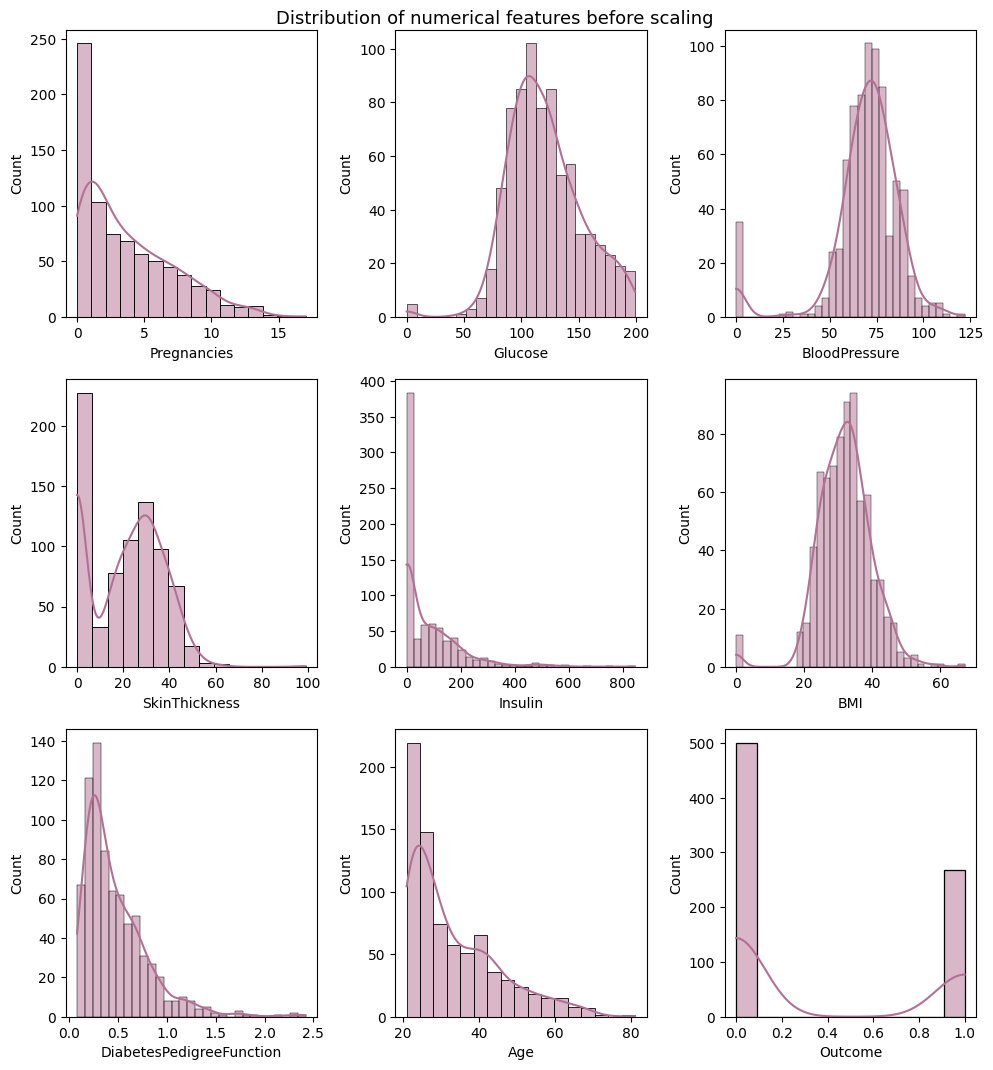

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

cols = data.columns 

plt.figure(figsize=(10, 14))
plt.suptitle('Distribution of numerical features before scaling', fontsize='13')
plt.subplots_adjust(top=0.93, wspace=1)


for i in range(len(data.columns)):
    plt.subplot(4, 3, i+1)
    sns.histplot(x=data[cols[i]], kde=True, color='#B47094')

save_fig('numeric_features_distplots')
plt.show();

## Distribution of outcome classes:

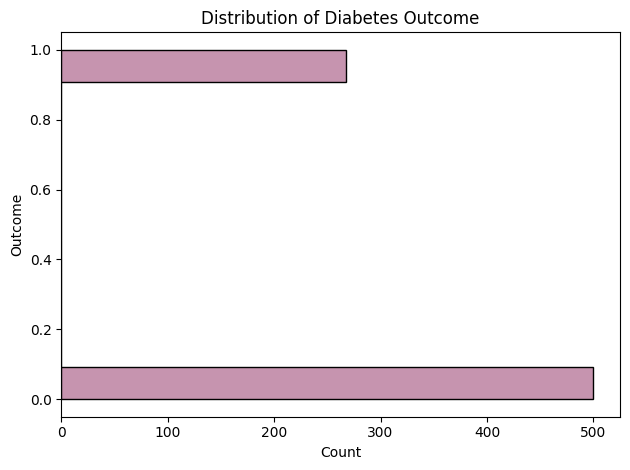

In [74]:
oPlot = sns.histplot(data=data, y=data['Outcome'], color='#B47094');
oPlot.set_title('Distribution of Diabetes Outcome');
save_fig('outcome_col_distribution')


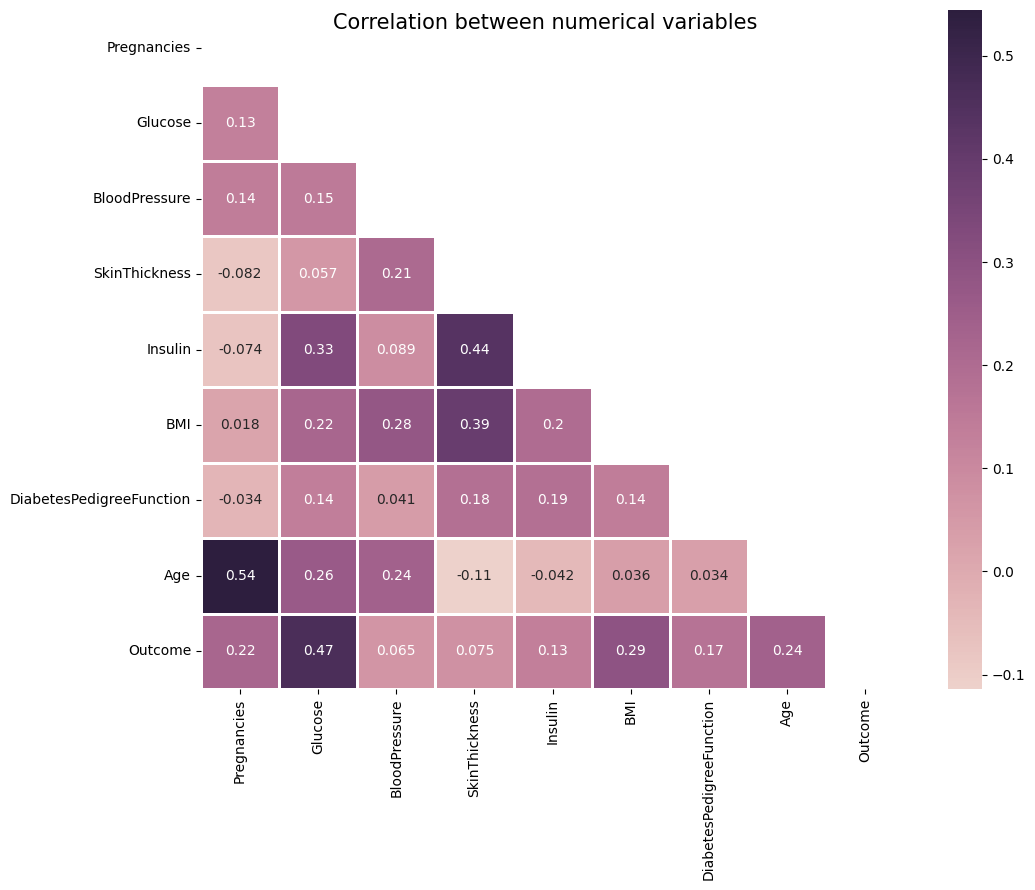

In [9]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
corr_plot = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
           cmap=sns.cubehelix_palette(as_cmap=True), mask=mask, cbar=True, 
            linecolor='white', linewidth=2)  
save_fig('feature_correlations')
f.suptitle('Correlation between numerical variables', fontsize='15');

The highest meaningful correlations found are between Outcome and Glucose, which is to be expected, Glucose and Insulin, and BMI and Outcome. The strongest correlations are Age and Pregnancies, and Insulin and SkinThickness. The correlation between age and the number of pregnancies is less likely to provide any insight because the number of pregnanices are reported by women of varying ages throughout their lifetimes, not necessarily *while* they were pregnant. We will need to expore the SkinThickness feature more to understand what this means.

#### Looking at the age distribution with pregnancies correlation for each outcome:
We can see that a woman in her 60s, for example, could have reported 6 pregnancies in her lifetime and it doens't mean that she is pregnant at 60. We will not investigate this further.

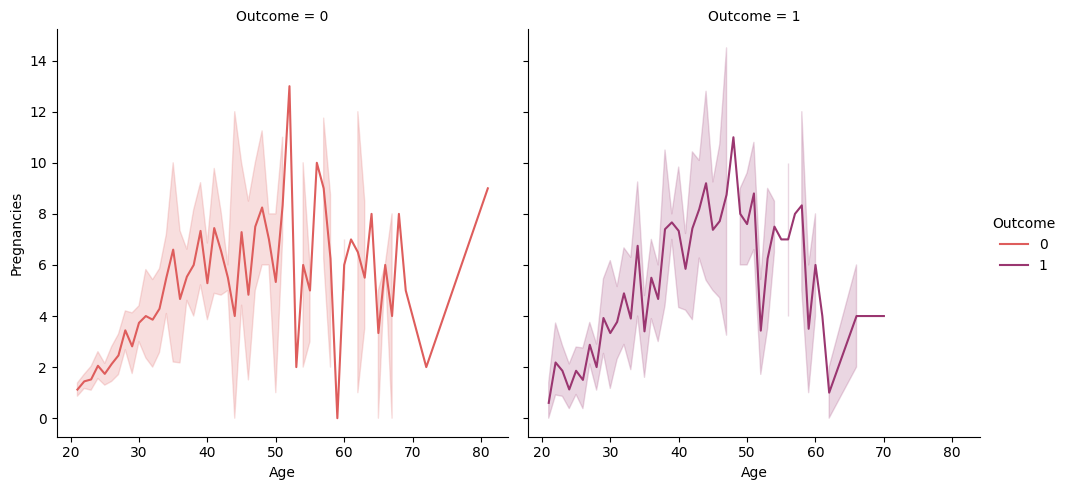

In [10]:
age_fig = sns.relplot(data=data, x='Age', y='Pregnancies', col='Outcome', hue='Outcome', kind='line', palette='flare')
# age_fig.figure.suptitle('Age distribution and pregnancy correlations for diabetes outcome');


#### What is SkinThickness? 

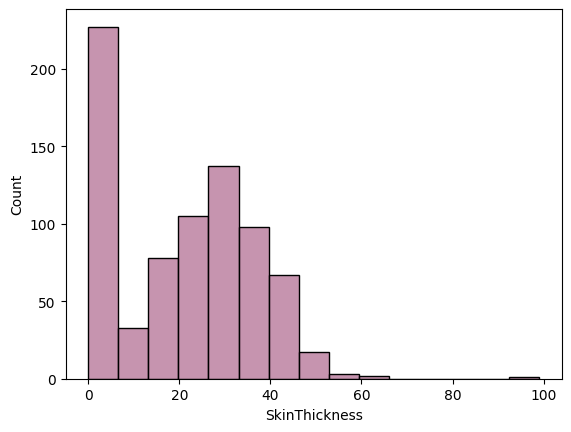

In [11]:
sns.histplot(data=data['SkinThickness'], color='#B47094');

Not only is the SkinThickness feature obscure but it is predomantly filled with zeros, we will drop this column later on.  

#### What is DiabetesPedigreeFunction? 


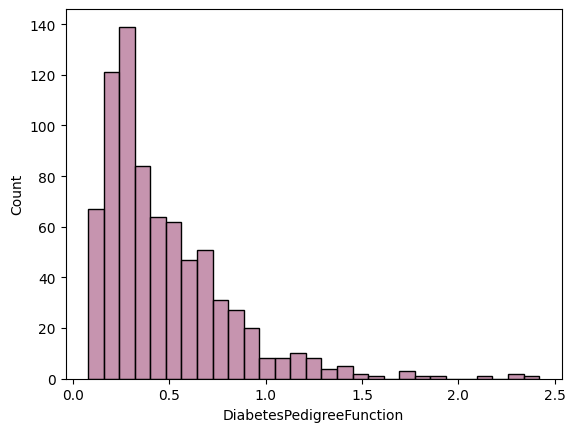

In [12]:
sns.histplot(data=data['DiabetesPedigreeFunction'], color='#B47094');

### Can we identify a correlation between number of pregnancies, glucose levels and outcome in this dataset? 

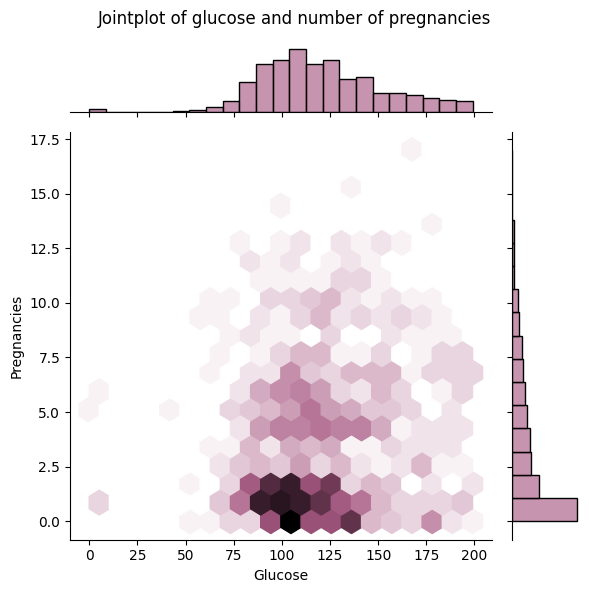

In [13]:
jPlot = sns.jointplot(x=data['Glucose'], y=data['Pregnancies'], kind='hex', color='#B47094')
jPlot.figure.suptitle('Jointplot of glucose and number of pregnancies')
save_fig('glucose_and_pregnancies')

In the plot above, we can identify some outliers, as well as opportunities to clean the data (some rows have a glucose value of 0). We can see that a large portion of rows represented in the dataset have never been pregnant, and we can also see that there are outliers rows with more than 12 pregnancies, with one row representing 15 pregancies. In addition, we can see the distribution of Glucose in our data, with the majority of glucose values being between 75 and 140. This is plot does not provide a strong linear correlation between Pregnancy and Glucose.


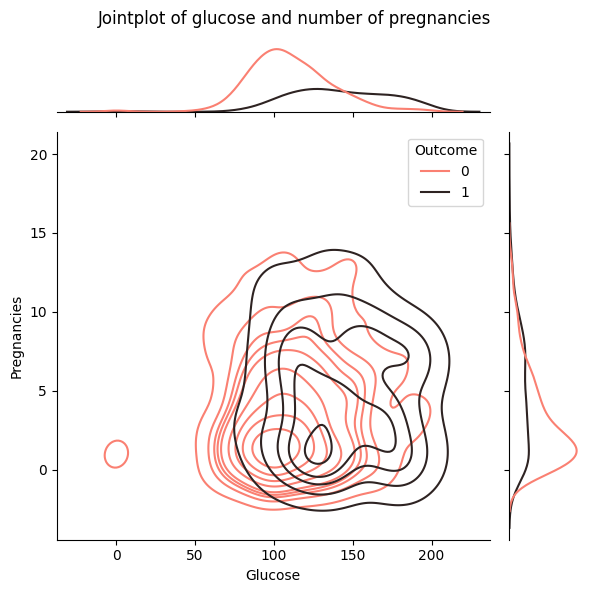

In [14]:
jPlot = sns.jointplot(x=data['Glucose'], y=data['Pregnancies'], kind='kde', hue=data['Outcome'], palette='dark:salmon_r')
jPlot.figure.suptitle('Jointplot of glucose and number of pregnancies')
save_fig('glucose_outcome_and_pregnancies')


The plot above shows that there is a slight difference in glucose levels among individuals with diabetes and without. However, it does not demonstrate a distinct difference between Pregnancies and Outcome.

A box plot will be able to provide better insight into the distribution of Glucose for the number of pregnancies.

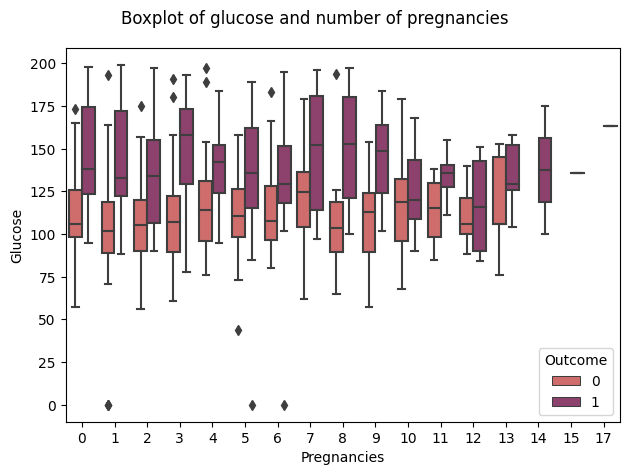

In [15]:
bPlotPG = sns.boxplot(x=data['Pregnancies'], y=data['Glucose'], hue=data['Outcome'], palette='flare')
bPlotPG.figure.suptitle('Boxplot of glucose and number of pregnancies')
save_fig('glucose_and_pregnancies_boxplot')

The box plot figure above shows a better representation of the distribution of glucose, outcome and number of pregnancies. However, there is no real correlation between women who had zero pregnancies and those who did. We will not investigate the correlation with pregnancies and diabetes further.

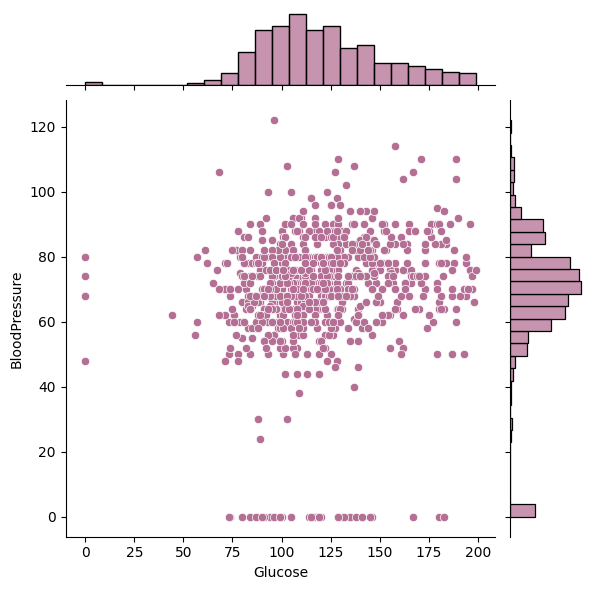

In [16]:
jPlotGBP = sns.jointplot(x=data['Glucose'], y=data['BloodPressure'], color='#B47094')

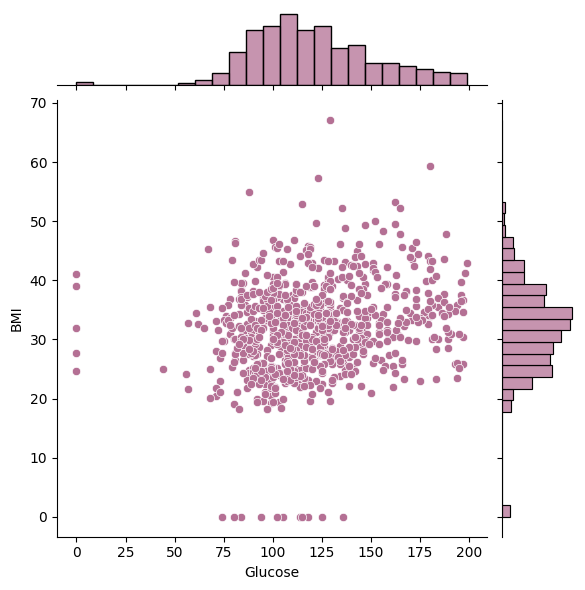

In [17]:
 sns.jointplot(x=data['Glucose'], y=data['BMI'], color='#B47094');

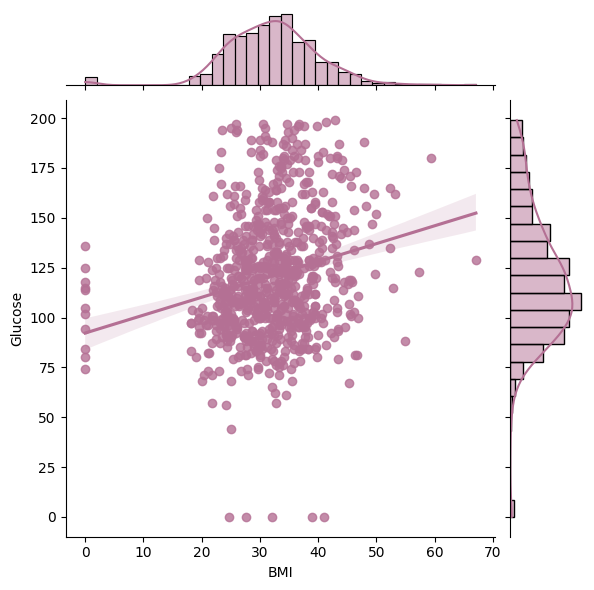

In [18]:
sns.jointplot(data=data, x='BMI', y='Glucose',kind='reg', color='#B47094');  ##col='Outcome',

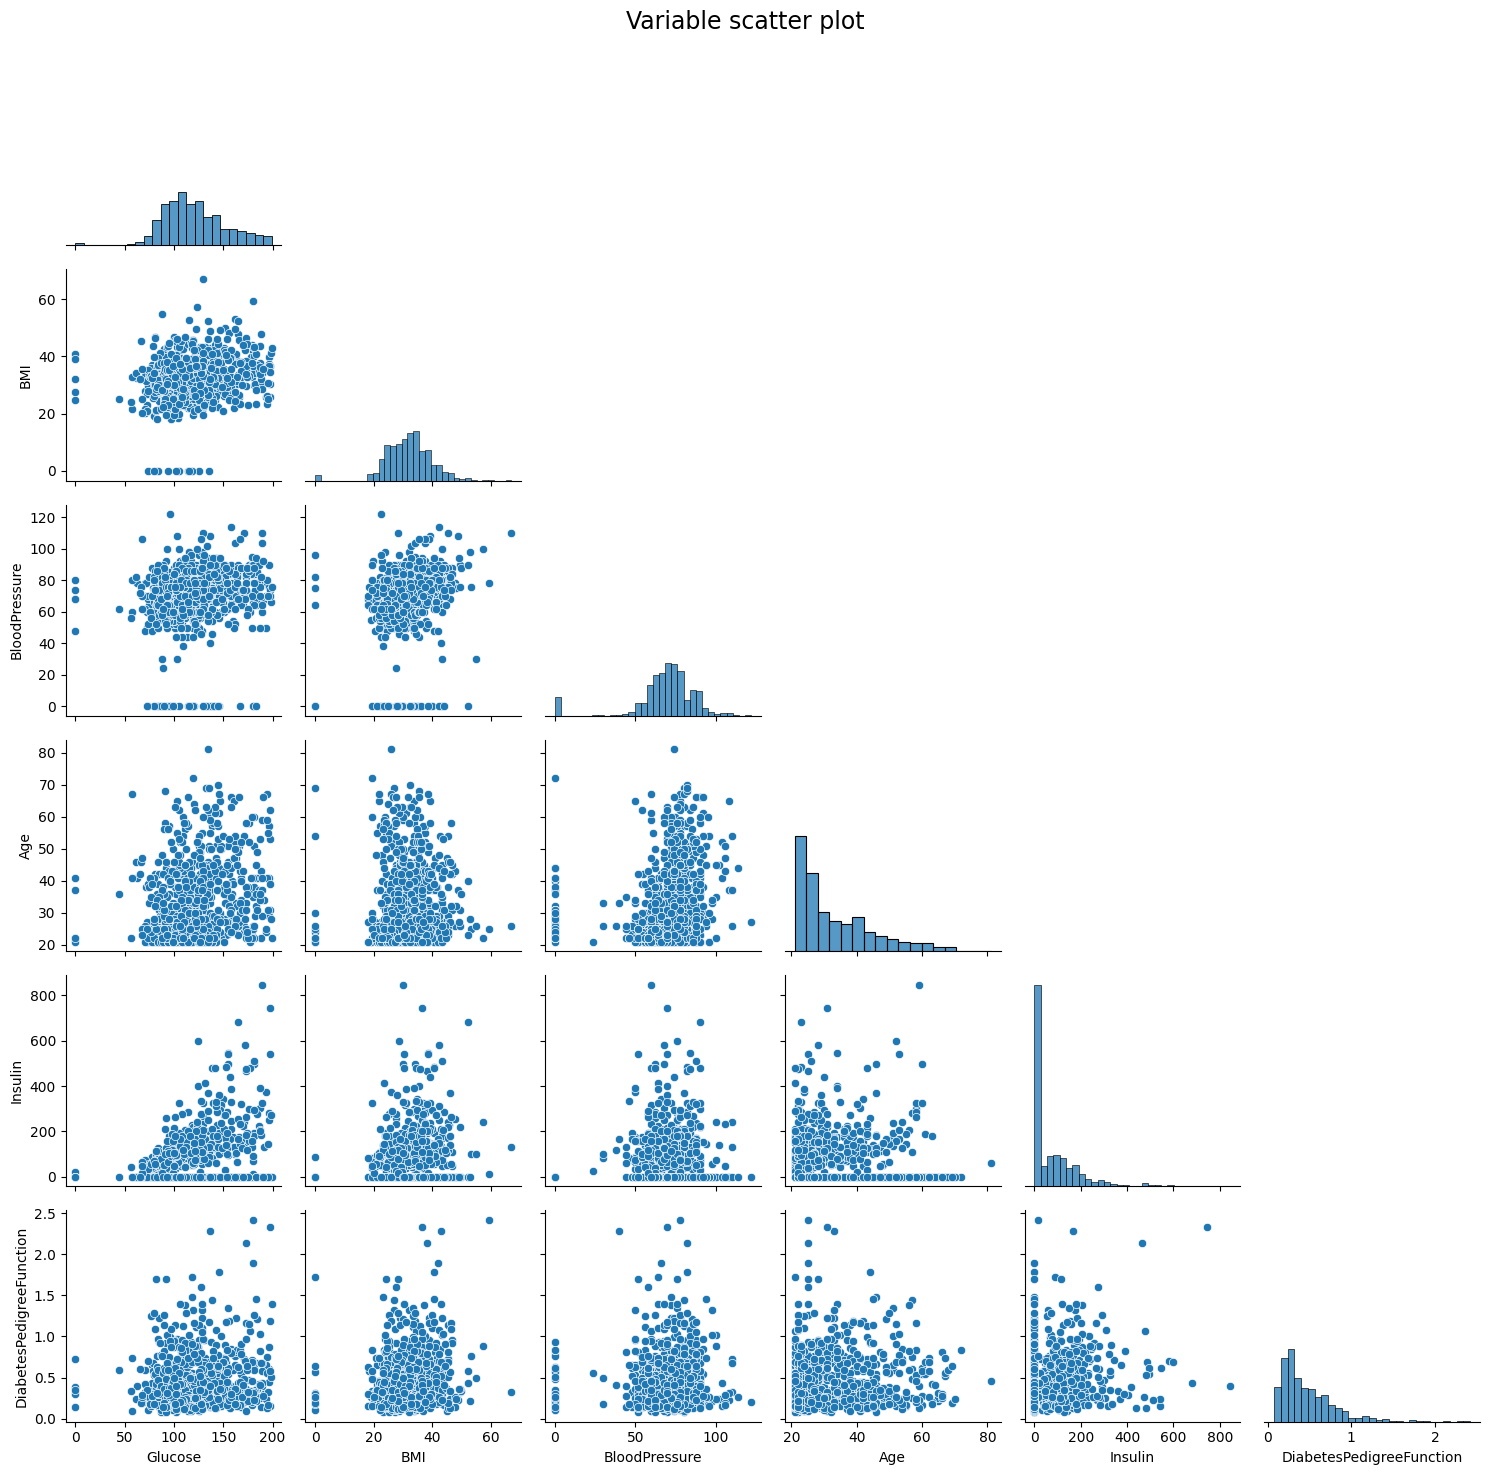

In [19]:
rel_cols = ['Glucose', 'BMI', 'BloodPressure', 'Age', 'Insulin', 'DiabetesPedigreeFunction']

data_plot = sns.pairplot(data[rel_cols],corner=True)
data_plot.fig.suptitle('Variable scatter plot', fontsize='17');
save_fig('scatter_plot')


## Data Cleaning:
* Cleaning values with unrealistic inputs:
    * BMI 
    * Glucose
    * Blood pressure
    * Skin Thickness
    * Insulin
    
   
There are values that are zero for these variable, we'll need to replace the zeros with the mean or median, as they more likely represent empty values. For the Insulin variable, a value of 0 is representative of an unknown value.

The "SkinThickness" feature is predominantly filled with zeros so we will drop this feature. 

We will drop the numeric features to be cleaned. Once cleaned, we will append them to the rest of the dataframe.

In [20]:
num_fts = data[['BMI', 'Glucose', 'BloodPressure', 'Insulin']]
num_fts

,BMI,Glucose,BloodPressure,Insulin
0,33.6,148,72,0
1,26.6,85,66,0
2,23.3,183,64,0
3,28.1,89,66,94
4,43.1,137,40,168
...,...,...,...,...
763,32.9,101,76,180
764,36.8,122,70,0
765,26.2,121,72,112
766,30.1,126,60,0


In [21]:
data = data.drop(['SkinThickness','BMI', 'Glucose', 'BloodPressure', 'Insulin'], axis=1)
data

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
0,6,0.627,50,1
1,1,0.351,31,0
2,8,0.672,32,1
3,1,0.167,21,0
4,0,2.288,33,1
...,...,...,...,...
763,10,0.171,63,0
764,2,0.340,27,0
765,5,0.245,30,0
766,1,0.349,47,1


We will need to make sure that our features are the same data type in order to be able to replace 0s with median value. 

In [22]:
num_fts.dtypes

BMI              float64
Glucose            int64
BloodPressure      int64
Insulin            int64
dtype: object

In [23]:
num_fts = num_fts.astype('float64')
num_fts.dtypes

BMI              float64
Glucose          float64
BloodPressure    float64
Insulin          float64
dtype: object

In [24]:
missing_vals = [0] 
cleaned_ft = num_fts.replace(missing_vals, np.NaN)
cleaned_ft

,BMI,Glucose,BloodPressure,Insulin
0,33.6,148.0,72.0,NaN
1,26.6,85.0,66.0,NaN
2,23.3,183.0,64.0,NaN
3,28.1,89.0,66.0,94.0
4,43.1,137.0,40.0,168.0
...,...,...,...,...
763,32.9,101.0,76.0,180.0
764,36.8,122.0,70.0,NaN
765,26.2,121.0,72.0,112.0
766,30.1,126.0,60.0,NaN


In [25]:
cleaned_ft.isnull().sum()

BMI               11
Glucose            5
BloodPressure     35
Insulin          374
dtype: int64

Let's replace the 0 values with the median for each feature:

In [26]:
for feature in cleaned_ft:
    print(feature)
    m = round(cleaned_ft[feature].median(), 2)
    cleaned_ft[feature] = cleaned_ft[feature].fillna(m)
    

BMI
Glucose
BloodPressure
Insulin


In [27]:
cleaned_ft

,BMI,Glucose,BloodPressure,Insulin
0,33.6,148.0,72.0,125.0
1,26.6,85.0,66.0,125.0
2,23.3,183.0,64.0,125.0
3,28.1,89.0,66.0,94.0
4,43.1,137.0,40.0,168.0
...,...,...,...,...
763,32.9,101.0,76.0,180.0
764,36.8,122.0,70.0,125.0
765,26.2,121.0,72.0,112.0
766,30.1,126.0,60.0,125.0


Let's check the null and empty values now: 

In [28]:
cleaned_ft.isnull().sum()

BMI              0
Glucose          0
BloodPressure    0
Insulin          0
dtype: int64

In [29]:
data

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
0,6,0.627,50,1
1,1,0.351,31,0
2,8,0.672,32,1
3,1,0.167,21,0
4,0,2.288,33,1
...,...,...,...,...
763,10,0.171,63,0
764,2,0.340,27,0
765,5,0.245,30,0
766,1,0.349,47,1


In [30]:
cleaned_ft

,BMI,Glucose,BloodPressure,Insulin
0,33.6,148.0,72.0,125.0
1,26.6,85.0,66.0,125.0
2,23.3,183.0,64.0,125.0
3,28.1,89.0,66.0,94.0
4,43.1,137.0,40.0,168.0
...,...,...,...,...
763,32.9,101.0,76.0,180.0
764,36.8,122.0,70.0,125.0
765,26.2,121.0,72.0,112.0
766,30.1,126.0,60.0,125.0


We will concatenate the recently cleaned numeric features (cleaned_ft) and to the original dataframe (data) that we originally dropped the numeric features from.

In [31]:
cleaned_df = pd.concat([data, cleaned_ft], axis=1)

In [32]:
cleaned_df

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,BMI,Glucose,BloodPressure,Insulin
0,6,0.627,50,1,33.6,148.0,72.0,125.0
1,1,0.351,31,0,26.6,85.0,66.0,125.0
2,8,0.672,32,1,23.3,183.0,64.0,125.0
3,1,0.167,21,0,28.1,89.0,66.0,94.0
4,0,2.288,33,1,43.1,137.0,40.0,168.0
...,...,...,...,...,...,...,...,...
763,10,0.171,63,0,32.9,101.0,76.0,180.0
764,2,0.340,27,0,36.8,122.0,70.0,125.0
765,5,0.245,30,0,26.2,121.0,72.0,112.0
766,1,0.349,47,1,30.1,126.0,60.0,125.0


## Standardization:

In [33]:
scaler = StandardScaler()

#### Dropping the 'Outcome' column

In [34]:
scaler.fit(cleaned_df.drop('Outcome',axis=1))


StandardScaler()

In [35]:
scaled_feats = scaler.transform(cleaned_df.drop('Outcome', axis=1))

In [36]:
scaled_feats

array([[ 0.63994726,  0.46849198,  1.4259954 , ...,  0.86604475,
        -0.03198993, -0.18154124],
       [-0.84488505, -0.36506078, -0.19067191, ..., -1.20506583,
        -0.5283186 , -0.18154124],
       [ 1.23388019,  0.60439732, -0.10558415, ...,  2.01666174,
        -0.69376149, -0.18154124],
       ...,
       [ 0.3429808 , -0.68519336, -0.27575966, ..., -0.02157407,
        -0.03198993, -0.33213179],
       [-0.84488505, -0.37110101,  1.17073215, ...,  0.14279979,
        -1.02464727, -0.18154124],
       [-0.84488505, -0.47378505, -0.87137393, ..., -0.94206766,
        -0.19743282, -0.18154124]])

In [37]:
scaled_df = pd.DataFrame(scaled_feats)

In [38]:
scaled_df.head()

,0,1,2,3,4,5,6
0,0.639947,0.468492,1.425995,0.166619,0.866045,-0.031990,-0.181541
1,-0.844885,-0.365061,-0.190672,-0.852200,-1.205066,-0.528319,-0.181541
2,1.233880,0.604397,-0.105584,-1.332500,2.016662,-0.693761,-0.181541
3,-0.844885,-0.920763,-1.041549,-0.633881,-1.073567,-0.528319,-0.540642
4,-1.141852,5.484909,-0.020496,1.549303,0.504422,-2.679076,0.316566


#### Features:

0: 'Pregnancies' <br>
1: 'DiabetesPedigreeFunction' <br>
2: 'Age' <br>
3: 'Outcome' <br>
4: 'BMI' <br>
5: 'Glucose' <br>
6: 'BloodPressure' <br>
7: 'Insulin'


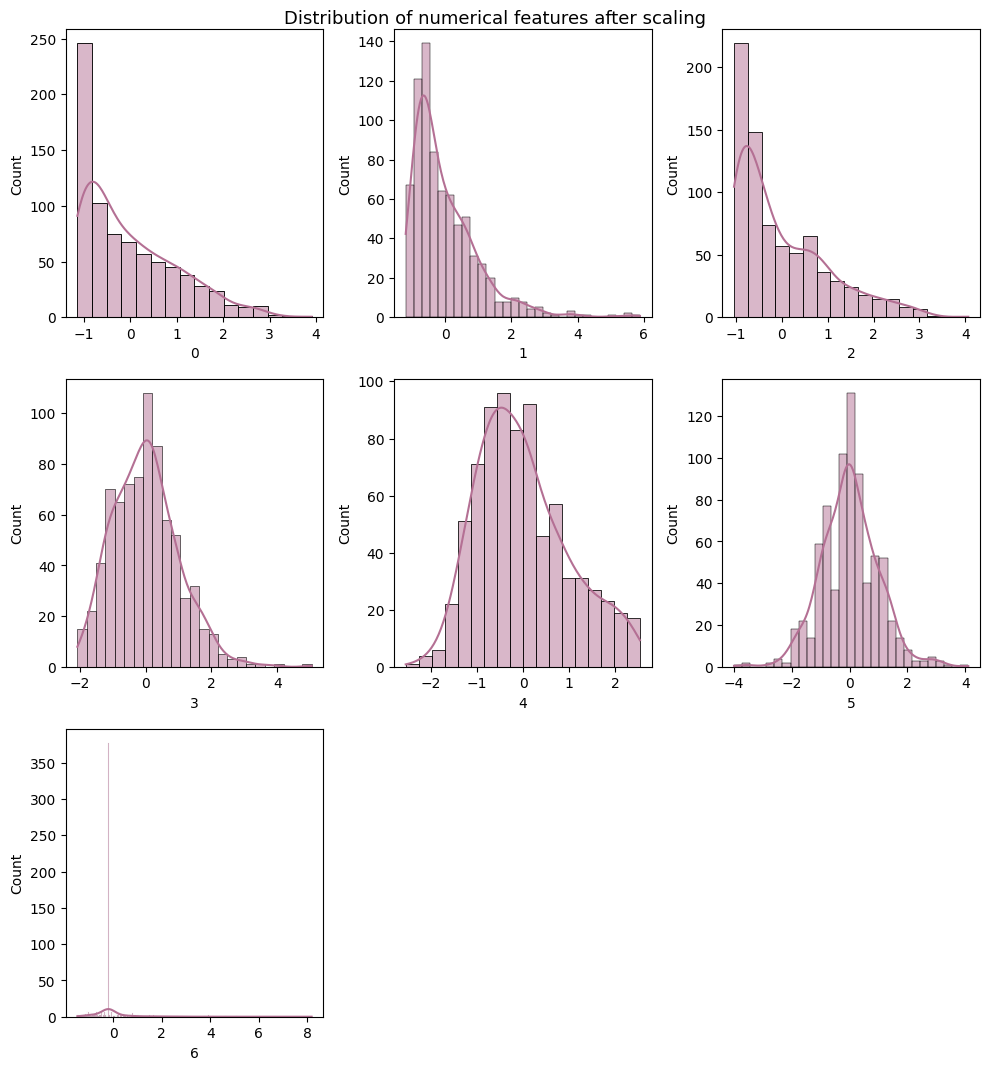

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

cols2 = scaled_df.columns 

plt.figure(figsize=(10, 14))
plt.suptitle('Distribution of numerical features after scaling', fontsize='13')
plt.subplots_adjust(top=0.93, wspace=1)


for i in range(len(scaled_df.columns)):
    plt.subplot(4, 3, i+1)
    sns.histplot(x=scaled_df[cols2[i]], kde=True, color='#B47094')

save_fig('scaled_numeric_features_distplots')
plt.show();

## Train/Test split:

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = scaled_df
y = data['Outcome']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

## Building model: KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [44]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

## Evaluation model:

In [45]:
predictions = knn.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[76 23]
 [24 31]]


In [47]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.76      0.77      0.76        99
           1       0.57      0.56      0.57        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154



### Let's break down the significance of the confusion matrix and classification report from above:


### Confusion Matrix
The confusion matrix breakds down the way our model classified the data into four different classes: 

True Positive (TP): Model predicted positive diabetes outcome, correctly.</br>
False Positive (FP): Model Predicted positive diabetic outcome, incorrectly.</br>
True Negative (TN): Model predicted negative diabetes outcome, correctly.</br>
False Negative (FN): Model predicated negative diabetes outcome, incorrectly.</br>

                     Predicted
                     
                       1    0
     
                   1   TP | FN (Recall)
         Actual
                   0   FP | TN
                 (Precision)

Our model classified:
* 76 True negative
* 77 False positive
* 57 False negative
* 56 True Positive


### Classification Report 
**Precision** measures our model's ability to correctly distinguish positive outcomes. Meaning, out of all the values that our model classified as positive, how many of them were actually positive?

Precision = TP/TP+FP = 79/79+20 = 79/99 = 0.7979% 
This means that out of all the positive classifications our model made, about 80% of them were positive diabetic outcomes. 
*Looks at the positive class* 

**Recall** measures the correct positive predictions our model made out of all the positive cases. In other words, it takes all of the positive cases in the dataset, and measures our model's predicted cases against the total number of positive cases (True Positives and False Negatives).

Recall = TP/TP+FN = 79/79+23 = 79/102 = 0.7745%
This means that our model can classify positive diabetes instances about 77% of the time. To compute this, we measure the True Positive diabetes cases over the total number of actual positive cases found in the dataset, including the False Negatives that our model didn't classify as positive.
*Looks at actual positive cases*


Which one of these measures is most important? The answer to this question varies on the problem and the most important piece of knowledge that you can get from the model. For example, in this case, the most important factor is determining who has diabetes. Therefore, our priority is to focus on correct diabetes classifications, and false negatives (those the model said that didn't have diabetes but did). These are the most important classes because early intervention efforts produce better patient outcomes. 

In other words, we need to know who is diabetic so we can provide the appropriate attention and care. If our model identifies a few people as diabetic that didn't end up having diabetes, it's not a big deal since it's better to be safe than sorry for in a harm reduction approach (Recall). On the other hand, our model can be quite efficient if it correctly detects a high number of diabetic patients out of all of the patients it assigns to the positive class (Precision). How can we find a balance between the two?
 

**F1-score**
F1-scores combines both Precision and Recall to evaluate the model's performance. It is the harmonic mean of both Precision and Recall, and comes in useful when it is important for us to find a balance between the two. 

F-score = 2*(precision * recall) / (precision + recall). 


In our case, a balance would be nice but high recall would be better. Let's see if we can achieve higher recall in our model by changing the K value.

## Choosing K value:

Plotting errors to find a good *K* value: Our goal is to find the K value that produces the least amount of errors

In [48]:
from sklearn import metrics

errors = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    errors.append(np.mean(predictions != y_test))

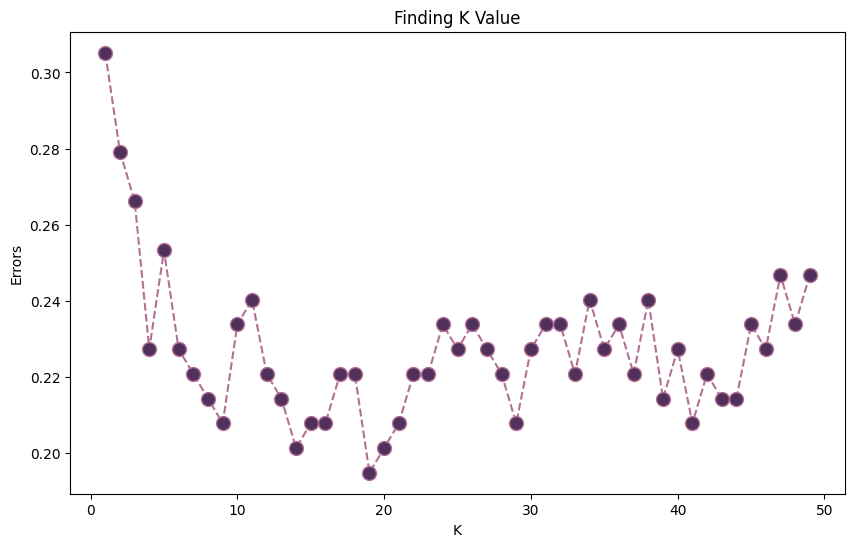

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), errors, color='#B47094', linestyle='dashed', marker='o',
         markerfacecolor='#4F315C', markersize=10)
plt.title('Finding K Value')
plt.xlabel('K')
plt.ylabel('Errors');

The figure above demonstrates the least amount of errors when K=14. Let's change K to 14 and evaluate the model's performance

In [50]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [51]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[93  6]
 [28 27]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        99
           1       0.82      0.49      0.61        55

    accuracy                           0.78       154
   macro avg       0.79      0.72      0.73       154
weighted avg       0.79      0.78      0.76       154



## KNN Conclusion:

As shown in the confusion matrix, and classification report above, we managed to increase recall from 80% to ~95% for our 0 class, while keeping precision for 1 class at around 84%, and the f1-score at 85% for the 0 class. As we mentioned earlier, our goal was to aim for a higher recall for harm reduction, even if it meant losing a little bit of precision. 

What this means for our project is that our model has gotten better at identifying non-positive diabetic patients in the whole dataset. However, our model performs poorly when identifying positive diabetes cases. Let's test out other classification models and see how they perform. 

## Building Mode: SVM Classification

In [52]:
from sklearn import svm

svc = svm.SVC()
svc.fit(X_train, y_train)

SVC()

In [53]:
svc_predictions = svc.predict(X_test)

In [54]:
print(confusion_matrix(y_test, svc_predictions))
print(classification_report(y_test, svc_predictions))

[[90  9]
 [26 29]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.76      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



## Building Mode: DecisionTree Classifier 

In [55]:
from sklearn.tree import DecisionTreeClassifier

dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

In [56]:
dTree_preds = dtree.predict(X_test)


In [57]:
print(classification_report(y_test,dTree_preds))
print(confusion_matrix(y_test,dTree_preds))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.63      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

[[79 20]
 [21 34]]


## Building Mode: Random Forest Classifier 

In [58]:
from sklearn.ensemble import RandomForestClassifier


In [59]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [60]:
rfc_preds = rfc.predict(X_test)

In [61]:
print(classification_report(y_test,rfc_preds))
print(confusion_matrix(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.70      0.55      0.61        55

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

[[86 13]
 [25 30]]


## Building Mode: Logistic Regression Classifier 


In [62]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring='neg_log_loss'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))



Logloss: -0.483 (0.059)


In [63]:
reg_model = model.fit(X_train, y_train)

In [64]:
reg_preds = model.predict(X_test)

In [65]:
print(classification_report(y_test,reg_preds))
print('Confusion Matrix: \n', confusion_matrix(y_test,reg_preds))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154

Confusion Matrix: 
 [[89 10]
 [25 30]]


# Conclusion:


Our initial goal was to create a model that performed well at classifying positive diabetes cases. As we can see, all of our models performed better at detecting patients who **did not** have diabetes (those in class 0). 

If we revisit the distribution of our two classes, we can see that there were a lot more rows consisting of patients who did not have diabetes vs those who did, meaning that our model had better data/information on patients who did not have diabetes. 


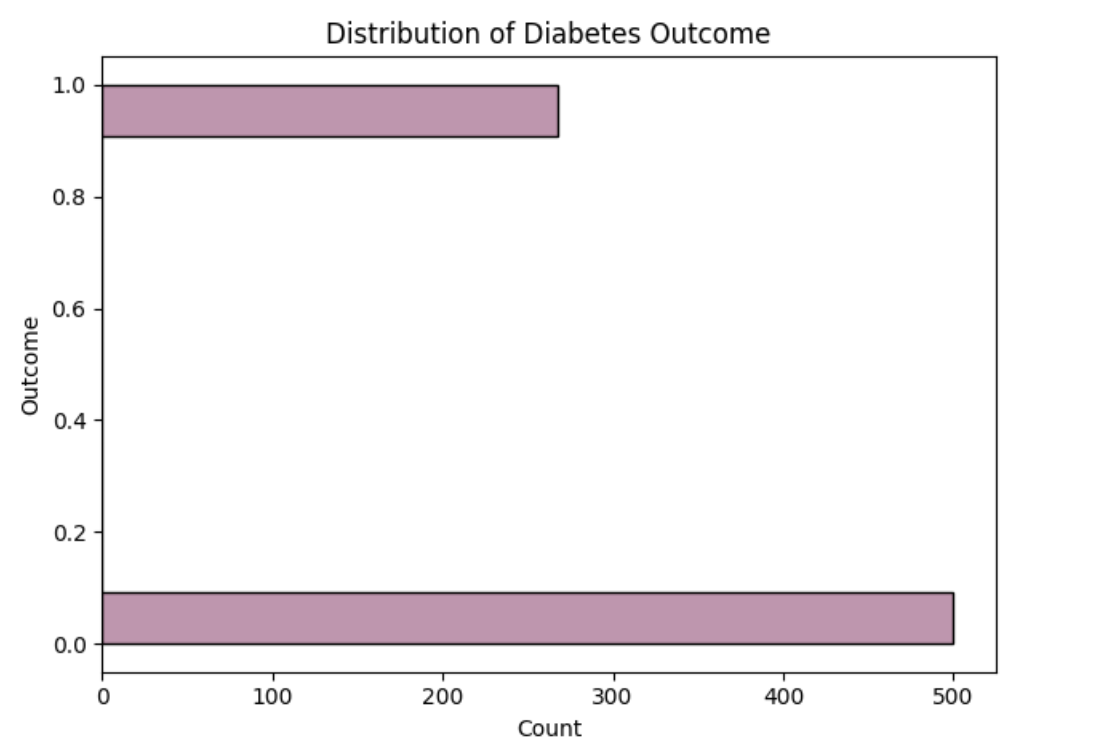


In order to achieve our goal, we would need to balance our data so that our models have a fair chance at learning and identifying both classes equally. With that being said, our KNN model with n-neighbors set to 18 performed the best at identifying cases with no diabetes. We determiend that we were more concerned with a model that provided a higher recall over precision. The results for that model ended up being ~ 94% for recall. 




This concludes our Diabetes Classification with KNN project. Some of the ways that we can expand on this project are: 

* Balanceing our data so that both classes of the outcome are equally represented.
* Find and train our models with more data.



References: [[10]](https://towardsdatascience.com/confusion-matrix-and-class-statistics-68b79f4f510b)
[[11]](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
[[12]](https://medium.com/codex/diabetes-predication-system-with-knn-algorithm-e040999229f7)
[[13](https://pub.towardsai.net/5-steps-to-build-a-knn-classifier-d0fd102b28b5)
